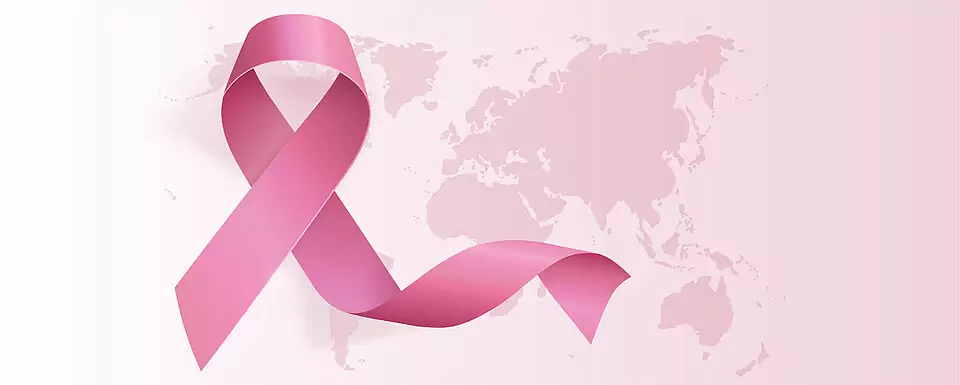

### Introduction

Breast cancer is one of the most common types of cancer in women worldwide and can often be fatal (Ferlay et al., 2010). A proper diagnosis of breast cancer is attained through the examintaion of many mammographic and clinical features. The diagnostic system should be able to differentiate between benign and malignant masses. To help radiologists in making decisions as to whether a tumor is benign or malignant, the posbility of using automated tools has been explored. Artificial intelligence and machine learning methods are popular methods that have been widely applied in distinguishing benign and malignant tumors. Since cancer is potentially fatal, the need to have accurate estimations is widely regarded as the basis for selecting a particular model. Artificial Neural Networks (ANN), have gained considerable interest in their use for medical analysis due to their ability to model non-linear relationships.
This study aims to showcase the use of ANN in breast cancer diagnosis using the Winconsin Breast Cancer dataset from Kaggle.

### Objective

The objective of this study is to create an ANN based model to be used in Breast Cancer Estimation.


### About the Dataset
The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The dataset can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

The Attribute Information is as follows:

* ID number
* Diagnosis (M = malignant, B = benign)3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

All feature values are recoded with four significant digits.


### Data Exploration

In [1]:
import sys
!{sys.executable} -m pip install tensorflow

zsh:1: no such file or directory: /Users/dominic/Downloads/Nexford_University/Applied


In [3]:
#Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf

### Step 1: Load the Dataset

In [4]:
# Read in the data
df = pd.read_csv("../data/data.csv")
df.head(10) # show the first ten rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


### Step 2: Data Preprocessing

#### Data Cleaning
In this step, we drop all the irrelevant columns from the dataset, encode the diagnosis column and check for missing values.

In [5]:
# Drop irrelvant columns
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace=True)

#Encode the diagnosis column where Malignant=1 and Benign=0
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

#Check for missing values
print(df.isnull().sum())

# Check the value counts for each of the diagnosis types. Benign (B) or Malignant (M)
df['diagnosis'].value_counts()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


diagnosis
0    357
1    212
Name: count, dtype: int64

There are no missing attribute values and the Class distribution apears as follows:
* 357 benign
* 212 malignant

#### Feature Scaling
First, we divide the data into independent and dependent variable (The diagnosis column). Then we encode the categorical data using the label encoder.

In [7]:
X = df.drop('diagnosis', axis = 1)
y = df['diagnosis']

# Standardize the feautures
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the Train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


### Step 3: Build ANN Model

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/Users/dominic/Downloads/Nexford_University/Applied Machine Learning for Analytics/milestone_2/cancer-diagnosis-ANN/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Step 4: Compile and Train the Model

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=16,
    verbose=1
)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5966 - loss: 0.6511 - val_accuracy: 0.8913 - val_loss: 0.4050
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9064 - loss: 0.3920 - val_accuracy: 0.9348 - val_loss: 0.2665
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9460 - loss: 0.2560 - val_accuracy: 0.9565 - val_loss: 0.1969
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9354 - loss: 0.2317 - val_accuracy: 0.9565 - val_loss: 0.1550
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9602 - loss: 0.1602 - val_accuracy: 0.9783 - val_loss: 0.1275
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9482 - loss: 0.1417 - val_accuracy: 0.9783 - val_loss: 0.1113
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9730 - loss: 0.0996 - val_accuracy: 0.9783 - val_loss: 0.1000
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9662 - loss: 0.1078 - val_accuracy: 0.9783 - 

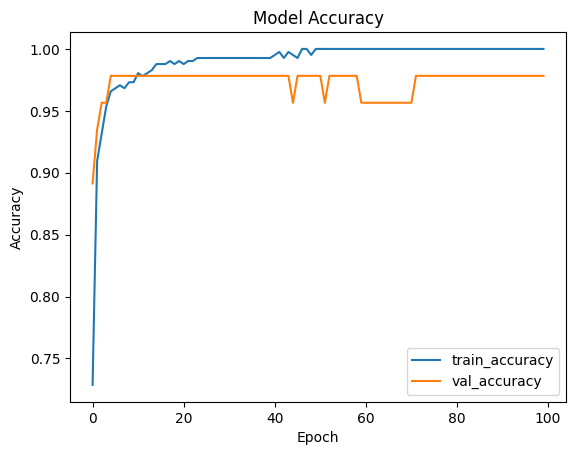

In [11]:
# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Step 5: Model Evaluation

#### Model Evaluation

In [12]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



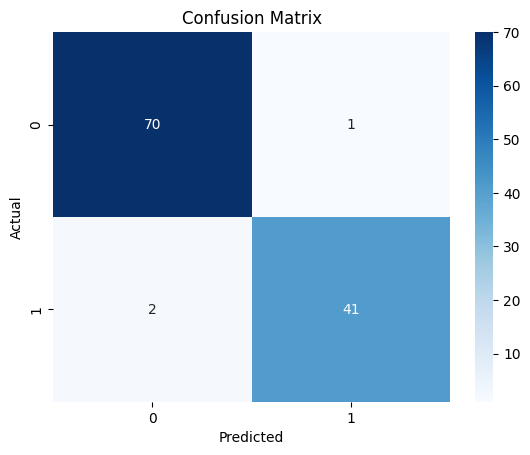

In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Step 6: Insights and Improvements

### Step 7: Conclusion

### References
1. Sepandi M, Taghdir M, Rezaianzadeh A, Rahimikazerooni S. Assessing Breast Cancer Risk with an Artificial Neural Network. Asian Pac J Cancer Prev. 2018 Apr 25;19(4):1017-1019. doi: 10.22034/APJCP.2018.19.4.1017. PMID: 29693975; PMCID: PMC6031801.
2. Tran KA, Kondrashova O, Bradley A, Williams ED, Pearson JV, Waddell N. Deep learning in cancer diagnosis, prognosis and treatment selection. Genome Med. 2021 Sep 27;13(1):152. doi: 10.1186/s13073-021-00968-x. PMID: 34579788; PMCID: PMC8477474.